<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sma
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

#### Read the data

Load the csv file and print the first five observations.

In [2]:
df = pd.read_csv(r"Fish.csv")
df.head()

,Species,Weight,V_length,D_length,C_length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Our objective is to predict the weight of a fish.

**The data definition is as follows:** <br>

**Species:** Species of a fish

**Weight:** Weight of a fish (target/dependent variable)

**V_length:** Vertical length of a fish

**D_length:** Diagonal length of a fish

**C_length:** Cross length of a fish

**Height:** Height of a fish

**Width:** Diagonal width of a fish

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model on the scaled data and check whether the model is overfitting or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# type your code here

X = pd.get_dummies(df.drop('Weight',axis=1))
y = df.Weight
model = sma.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     194.7
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           9.67e-82
Time:                        22:57:33   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
V_length            -79.3905     36.277     -2.188      0.030    -151.082      -7.699
D_length             83.5100     45.716      1.827      0.070      -6.835     173.856
C_length             28.0340     29.299      0.957      0.340     -29.867      85.935
Height                6.3568     13.055      0.487      0.627     -19.444      32.157
Width                -1.0454     23.912     -0.044      0.965     -48.301      46.210
Species_Bream      -907.1500    127.078     -7.139      0.000   -1158.285    -656.015
Species_Parkki     -749.9895     66.582    -11.264      0.000    -881.571    -618.408
Species_Perch      -777.9434     39.540    -19.675      0.000    -856.083    -699.804
Species_Pike      -1116.7667     92.635    -12.056      0.000   -1299.834    -933.699
Species_Roach      -800.3616     55.032    -14.544      0.000    -909.117    -691.606
Species_Smelt      -468.7569     36.276    -12.922      0.000    -540.447    -397.067
Species_Whitefish  -817.8619     67.578    -12.103      0.000    -951.412    -684.312
==============================================================================
Omnibus:                       42.986   Durbin-Watson:                   0.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.736
Skew:                           1.170   Prob(JB):                     1.63e-21
Kurtosis:                       5.996   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present in the scaled data?
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in ['V_length','D_length','C_length','Height','Width']:
    df[i] = sc.fit_transform(pd.DataFrame(df[i]))

Yes, there is molticollinearity in the scaled data.

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
li = []
for i in range(X.shape[1]):
    li.append(variance_inflation_factor(X.values,i))
pd.DataFrame({'Name':X.columns,'VIF':li})

,Name,VIF
0,V_length,2360.425082
1,D_length,4307.918109
2,C_length,2076.937150
3,Height,56.203702
4,Width,29.166505
5,Species_Bream,64.207663
6,Species_Parkki,5.539718
7,Species_Perch,9.945709
8,Species_Pike,16.572044
9,Species_Roach,6.880800


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Apply the ridge regression with 'alpha = 1.5' and compare the RMSE on the test dataset with the RMSE obtained from linear regression using OLS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# type your code here
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.5)

model2 = ridge.fit(X,y)

pred = model2.predict(X)
np.sqrt(mean_squared_error(y,pred)) , np.sqrt(mean_squared_error(y,model.fittedvalues))

(92.7531610426004, 90.21305484788708)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a full model using SGD. Plot a multiple barchart to compare the beta coefficients for each variable obtained by the SGD model and the full model build using OLS 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

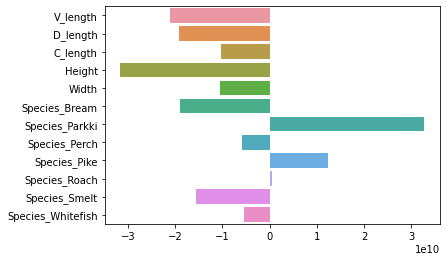

In [13]:
# type your code here
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
model3 = sgd.fit(X,y)

sns.barplot(y=X.columns,x=model3.coef_)

<AxesSubplot:>

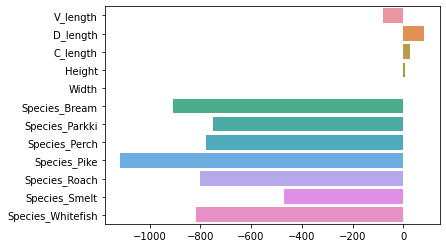

In [15]:
sns.barplot(y=X.columns,x=model.params)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the least significant variables in the data by considering 'alpha = 0.1' 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

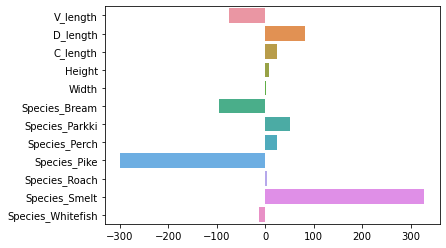

In [11]:
# type your code here
r = Ridge(alpha = 0.1)
sns.barplot(y=X.columns,x=r.fit(X,y).coef_)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of diagonal width on the weight of a fish?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
import statsmodels.formula.api as sfa
sfa.ols('Weight~Width',data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     579.0
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           1.52e-54
Time:                        23:04:29   Log-Likelihood:                -1036.9
No. Observations:                 159   AIC:                             2078.
Df Residuals:                     157   BIC:                             2084.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    399.2698     13.122     30.428      0.000     373.352     425.188
Width        315.7522     13.122     24.063      0.000     289.834     341.670
==============================================================================
Omnibus:                      100.078   Durbin-Watson:                   0.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              635.292
Skew:                           2.298   Prob(JB):                    1.12e-138
Kurtosis:                      11.647   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Which value of alpha from the list of values returns lowest RMSE on the test set in ridge regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.00001, 0.001, 0.1, 10, 100]
    
Consider 5-fold cross validation.

In [20]:
# type your code here
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

ridge = Ridge()

params = {'alpha':[0.00001, 0.001, 0.1, 10, 100]}
gcv = GridSearchCV(estimator=ridge ,param_grid=params,scoring='neg_root_mean_squared_error',cv=5)

print('Best Alpha :',gcv.fit(X,y).best_params_)

Best Alpha : {'alpha': 10}


In [21]:
ridge = Ridge(alpha=10)
np.sqrt(mean_squared_error(y , ridge.fit(X,y).predict(X)))

103.49365497083454

In [26]:
l = []
kfold = KFold(n_splits=5,shuffle=True)
for i,j in kfold.split(X,y):
    xtrain = X.loc[i]
    xtest = X.loc[j]
    ytrain = y.loc[i] 
    ytest = y.loc[j]
    l.append(ridge.fit(xtrain,ytrain).predict(X))
np.sqrt(mean_squared_error(y , pd.DataFrame(l).T.mean(axis=1)))

105.32502889861375

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Select the best value for the elastic net mixing parameter from the list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the below list of values:

    list_of_parameter = [0.0001, 0.001, 0.01, 0.1, 1]

Consider 5-fold cross validation.

In [23]:
# type your code here
from sklearn.linear_model import ElasticNet
enet = ElasticNet()

params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1]}

gcv = GridSearchCV(estimator=enet ,param_grid=params,scoring='neg_root_mean_squared_error',cv=5)

print('Best Alpha :',gcv.fit(X,y).best_params_)

Best Alpha : {'alpha': 1}


In [24]:
enet = ElasticNet(alpha=0.1)
np.sqrt(mean_squared_error(y , enet.fit(X,y).predict(X)))

102.0968518977193

In [25]:
l = []
kfold = KFold(n_splits=5,shuffle=True)
for i,j in kfold.split(X,y):
    xtrain = X.loc[i]
    xtest = X.loc[j]
    ytrain = y.loc[i]
    ytest = y.loc[j]
    l.append(enet.fit(xtrain,ytrain).predict(X))
np.sqrt(mean_squared_error(y , pd.DataFrame(l).T.mean(axis=1)))

102.20314727408136

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the best value of alpha from the list of values for lasso regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.0001, 0.001, 0.1, 1, 2, 3]
    
Consider 5-fold cross validation.

In [27]:
# type your code here
from sklearn.linear_model import Lasso
lasso = Lasso()

params = {'alpha':[0.0001, 0.001, 0.1, 1, 2, 3]}
gcv = GridSearchCV(estimator=lasso ,param_grid=params,scoring='neg_root_mean_squared_error',cv=5)
print('Best Alpha :',gcv.fit(X,y).best_params_)

Best Alpha : {'alpha': 3}


In [28]:
lasso = Lasso(alpha=3)
np.sqrt(mean_squared_error(y , lasso.fit(X,y).predict(X)))

95.9501130726571

In [29]:
l = []
kfold = KFold(n_splits=5,shuffle=True)
for i,j in kfold.split(X,y):
    xtrain = X.loc[i]
    xtest = X.loc[j]
    ytrain = y.loc[i]
    ytest = y.loc[j]
    l.append(lasso.fit(xtrain,ytrain).predict(X))
np.sqrt(mean_squared_error(y , pd.DataFrame(l).T.mean(axis=1)))

96.25431292880718

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build the elastic net regression model with 'alpha = 0.1' and best l1_ratio obtained by the GridSearchCV method. Also, compute the RMSE for test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# type your code here
l1 = [i*0.1 for i in range(1,11)]

In [31]:
enet = ElasticNet()
params = {'l1_ratio':l1}
gcv = GridSearchCV(estimator=enet ,param_grid=params,scoring='neg_root_mean_squared_error',cv=5)
print('Best Alpha :',gcv.fit(X,y).best_params_)

Best Alpha : {'l1_ratio': 0.9}


In [32]:
enet = ElasticNet(alpha=0.1,l1_ratio=0.9)
np.sqrt(mean_squared_error(y , lasso.fit(X,y).predict(X)))

95.9501130726571

In [33]:
l = []
kfold = KFold(n_splits=5,shuffle=True)
for i,j in kfold.split(X,y):
    xtrain = X.loc[i]
    xtest = X.loc[j]
    ytrain = y.loc[i]
    ytest = y.loc[j]
    l.append(enet.fit(xtrain,ytrain).predict(X))
np.sqrt(mean_squared_error(y , pd.DataFrame(l).T.mean(axis=1)))

94.24873570209061